In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import scipy.optimize as sco
import scipy.constants as c
from scipy.optimize import curve_fit as cf
import pandas as pd

In [86]:
def dirac(wavelen,T,E_F):
    E=c.h * c.c / wavelen /c.e
    return 500/ ( np.exp((E-E_F)/8.6e-5 /T) -1 ) # k_B in eV
def diracE(E,T,E_F):
    return 1/ ( np.exp((E-E_F)/c.k/T) -1 ) 

def heavi(x,A,b,c):
    return A * (np.sign(x-b) + c) # A=amp/2 , b=Eg in nm

def expon(x,A,E_g):
    E=c.h * c.c / x /c.e
    return A * np.exp(E/E_g)

C:\Users\Gunther\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


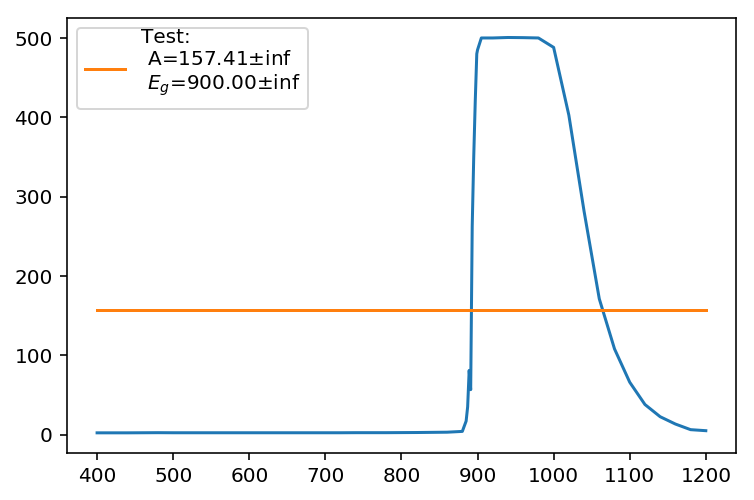

In [91]:
data=[]
data.append( pd.read_csv("Data/{}.txt".format("Links"),delimiter="\t",skiprows=1 ))

wavelen, intens =[],[]
for entry in data:
    wavelen= entry.values[:,0]
    intens = entry.values[:,1]
    
testEF=c.hbar**2 / 2/ 28 * c.N_A * (3 *np.pi * c.N_A)**(2/3)

T77 = lambda x,Eg: dirac(x,300,Eg)
#popt,pcov= cf(heavi, wavelen[20:-10], intens[20:-10], p0=[250,900,1])
popt,pcov= cf(expon, wavelen[20:-16], intens[20:-16], p0=[500,900])
perr=np.sqrt(np.diag(pcov))

wavelen=np.array(wavelen)
xdata=np.linspace(400,1200,1000)
fig, ax = plt.subplots(dpi=144)
ax.plot(wavelen,intens)
ax.plot(xdata,expon(xdata,*popt), label="Test: \n A={o[0]:.2f}$\pm${e[0]:.2f} \n $E_g$={o[1]:.2f}$\pm${e[1]:.2f}".format(o=popt,e=perr))
#ax.plot(xdata, heavi(xdata,*popt), label="Heaviside Fit: \n A={o[0]:.2f}$\pm${e[0]:.2f} \n b={o[1]:.2f}$\pm${e[1]:.2f} \n c={o[2]:.2f}$\pm${e[2]:.2f}".format(o=popt,e=perr))
ax.legend();